In [1]:
# THIS NOTEBOOK TRAINS THE RNN LSTM MANY-TO-MANY MODEL WHERE PAST AND FUTURE ARE EQUAL LENGTH

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import os
import numpy as np
from data_loader import DataLoader
from utils.visualize import show_images_in_grid, show_images_as_video, show_reconstructions, compare_images_as_video
from cnn import Autoencoder
from rnn_many_to_many import Seq2Seq
import random
import matplotlib.pyplot as plt

Using TensorFlow backend.
/home/abhi/anaconda3/envs/envTF113/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/abhi/anaconda3/envs/envTF113/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/abhi/anaconda3/envs/envTF113/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/abhi/anaconda3

In [4]:
root = os.getcwd()

In [5]:
rnn_data_loader = DataLoader()

In [6]:
rnn_data_loader.X_train = np.load(root+"/../datasets/train/32/X_train_normalized.npy")
rnn_data_loader.X_val = np.load(root+"/../datasets/val/32/X_val_normalized.npy")
rnn_data_loader.X_test = np.load(root+"/../datasets/test/32/X_test_normalized.npy")

In [7]:
# LET'S COMPUTE THE EMBEDDINGS FROM THE DATA AND TRAINED AUTOENCODER

In [8]:
ae = Autoencoder()
ae.build_model(input_dim=(32, 32, 3), latent_dim=(64,))
ae.set_weights(root+"/../models/autoencoder_32.h5")

Instructions for updating:
Colocations handled automatically by placer.


In [9]:
X_train = ae.encode_series(rnn_data_loader.X_train)
X_val = ae.encode_series(rnn_data_loader.X_val)
X_test = ae.encode_series(rnn_data_loader.X_test)

In [10]:
X_train.shape

(160, 100, 64)

In [11]:
seq = Seq2Seq()
seq.build_model(input_length=50, input_dim=64, latent_dim=(256,), output_length=50, output_dim=64)

In [12]:
# seq.set_weights(root+"/../models/seq2seq_many_to_many_past_future_32.h5")

In [13]:
seq.model.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 50, 64)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 50, 1024)          4460544   
_________________________________________________________________
lstm_2 (LSTM)                (None, 50, 512)           3147776   
_________________________________________________________________
lstm_3 (LSTM)                (None, 256)               787456    
_________________________________________________________________
repeat_vector_1 (RepeatVecto (None, 50, 256)           0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 50, 512)           1574912   
_________________________________________________________________
lstm_5 (LSTM)                (None, 50, 1024)          6295

In [14]:
history = {
    "loss" : [],
    "val_loss" : []
} 

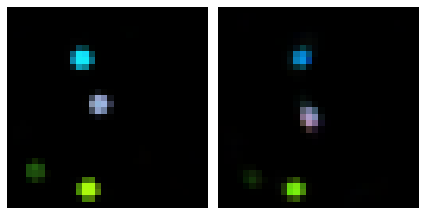

EPOCH 501
Train on 160 samples, validate on 20 samples
Epoch 1/1
160/160 [==============================] - 1s 4ms/step - loss: 231.3343 - val_loss: 1009.1931
EPOCH 502
Train on 160 samples, validate on 20 samples
Epoch 1/1
160/160 [==============================] - 1s 4ms/step - loss: 251.4326 - val_loss: 1020.1851
EPOCH 503
Train on 160 samples, validate on 20 samples
Epoch 1/1
160/160 [==============================] - 1s 4ms/step - loss: 252.9366 - val_loss: 1017.0817
EPOCH 504
Train on 160 samples, validate on 20 samples
Epoch 1/1
160/160 [==============================] - 1s 4ms/step - loss: 250.2757 - val_loss: 1014.5906
EPOCH 505
Train on 160 samples, validate on 20 samples
Epoch 1/1
160/160 [==============================] - 1s 4ms/step - loss: 238.6925 - val_loss: 1017.3729
EPOCH 506
Train on 160 samples, validate on 20 samples
Epoch 1/1
160/160 [==============================] - 1s 4ms/step - loss: 232.4664 - val_loss: 1011.9272
EPOCH 507
Train on 160 samples, validate on 20

EPOCH 604
Train on 160 samples, validate on 20 samples
Epoch 1/1
160/160 [==============================] - 1s 4ms/step - loss: 176.7680 - val_loss: 1031.2983
EPOCH 605
Train on 160 samples, validate on 20 samples
Epoch 1/1
160/160 [==============================] - 1s 4ms/step - loss: 173.4313 - val_loss: 1032.9463
EPOCH 606
Train on 160 samples, validate on 20 samples
Epoch 1/1
160/160 [==============================] - 1s 4ms/step - loss: 170.8591 - val_loss: 1029.5289
EPOCH 607
Train on 160 samples, validate on 20 samples
Epoch 1/1
160/160 [==============================] - 1s 4ms/step - loss: 171.9943 - val_loss: 1030.4054
EPOCH 608
Train on 160 samples, validate on 20 samples
Epoch 1/1
160/160 [==============================] - 1s 4ms/step - loss: 175.4266 - val_loss: 1032.7545
EPOCH 609
Train on 160 samples, validate on 20 samples
Epoch 1/1
160/160 [==============================] - 1s 4ms/step - loss: 175.8975 - val_loss: 1034.6924
EPOCH 610
Train on 160 samples, validate on 20

EPOCH 707
Train on 160 samples, validate on 20 samples
Epoch 1/1
160/160 [==============================] - 1s 4ms/step - loss: 149.7582 - val_loss: 1055.1703
EPOCH 708
Train on 160 samples, validate on 20 samples
Epoch 1/1
160/160 [==============================] - 1s 4ms/step - loss: 146.3051 - val_loss: 1055.1199
EPOCH 709
Train on 160 samples, validate on 20 samples
Epoch 1/1
160/160 [==============================] - 1s 4ms/step - loss: 142.5021 - val_loss: 1063.0210
EPOCH 710
Train on 160 samples, validate on 20 samples
Epoch 1/1
160/160 [==============================] - 1s 4ms/step - loss: 141.2463 - val_loss: 1061.7365
EPOCH 711
Train on 160 samples, validate on 20 samples
Epoch 1/1
160/160 [==============================] - 1s 4ms/step - loss: 139.1563 - val_loss: 1058.6353
EPOCH 712
Train on 160 samples, validate on 20 samples
Epoch 1/1
160/160 [==============================] - 1s 4ms/step - loss: 138.5925 - val_loss: 1058.2784
EPOCH 713
Train on 160 samples, validate on 20

EPOCH 810
Train on 160 samples, validate on 20 samples
Epoch 1/1
160/160 [==============================] - 1s 4ms/step - loss: 116.7125 - val_loss: 1081.8092
EPOCH 811
Train on 160 samples, validate on 20 samples
Epoch 1/1
160/160 [==============================] - 1s 4ms/step - loss: 117.3720 - val_loss: 1078.6273
EPOCH 812
Train on 160 samples, validate on 20 samples
Epoch 1/1
160/160 [==============================] - 1s 4ms/step - loss: 118.8575 - val_loss: 1083.3184
EPOCH 813
Train on 160 samples, validate on 20 samples
Epoch 1/1
160/160 [==============================] - 1s 4ms/step - loss: 120.2473 - val_loss: 1081.2260
EPOCH 814
Train on 160 samples, validate on 20 samples
Epoch 1/1
160/160 [==============================] - 1s 4ms/step - loss: 119.4528 - val_loss: 1081.7572
EPOCH 815
Train on 160 samples, validate on 20 samples
Epoch 1/1
160/160 [==============================] - 1s 4ms/step - loss: 120.8441 - val_loss: 1085.1024
EPOCH 816
Train on 160 samples, validate on 20

EPOCH 913
Train on 160 samples, validate on 20 samples
Epoch 1/1
160/160 [==============================] - 1s 4ms/step - loss: 116.2309 - val_loss: 1080.5535
EPOCH 914
Train on 160 samples, validate on 20 samples
Epoch 1/1
160/160 [==============================] - 1s 4ms/step - loss: 112.8637 - val_loss: 1078.6591
EPOCH 915
Train on 160 samples, validate on 20 samples
Epoch 1/1
160/160 [==============================] - 1s 4ms/step - loss: 108.2513 - val_loss: 1082.5264
EPOCH 916
Train on 160 samples, validate on 20 samples
Epoch 1/1
160/160 [==============================] - 1s 4ms/step - loss: 107.6486 - val_loss: 1073.8495
EPOCH 917
Train on 160 samples, validate on 20 samples
Epoch 1/1
160/160 [==============================] - 1s 4ms/step - loss: 104.7609 - val_loss: 1077.8673
EPOCH 918
Train on 160 samples, validate on 20 samples
Epoch 1/1
160/160 [==============================] - 1s 4ms/step - loss: 103.3530 - val_loss: 1076.9043
EPOCH 919
Train on 160 samples, validate on 20

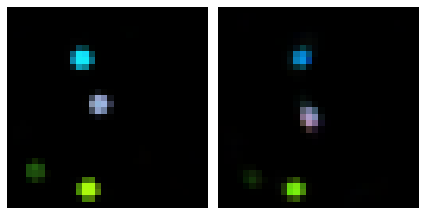

In [17]:
# TRAIN LOOP
for epoch in range(1000):
    print('EPOCH %d' % (epoch))
    hist = seq.train(X_train=X_train[:, 0:X_train.shape[1]//2, :], 
                     Y_train=X_train[:, X_train.shape[1]//2:, :], 
                     X_val=X_val[:, 0:X_val.shape[1]//2, :], 
                     Y_val=X_val[:, X_train.shape[1]//2:, :], 
                     epochs=1, 
                     batch_size=32
                     )
    history["loss"].append(hist.history["loss"][0])
    history["val_loss"].append(hist.history["val_loss"][0])
    if epoch % 500 == 0:
        i = random.randint(0, X_train.shape[0]-1)
        X, Y = [], []
        x = X_train[i, 0:X_train.shape[1]//2, :]
        X.append(x)
        X = np.array(X)
        y = X_train[i, X_train.shape[1]//2:, :]
        Y.append(y)
        Y = np.array(Y)
        Y_hat = seq.model.predict(X)
        Y_decoded = ae.decode_series(Y)
        Y_hat_decoded = ae.decode_series(Y_hat)
        compare_images_as_video(Y_decoded[0], Y_hat_decoded[0])
    seq.save_weights(root+"/../models/seq2seq_many_to_many_past_future_32.h5")

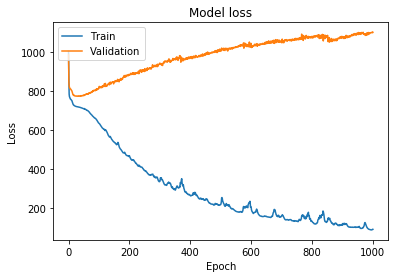

In [18]:
# Plot training & validation loss values
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()